<a href="https://colab.research.google.com/github/Harsha-Gobinath/Data_Science/blob/main/multiple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [6]:
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Data Preprocessing

In [9]:
data = data.dropna()
data.shape

(10000, 6)

In [10]:
output_col = 'Performance Index'

In [12]:
x = data.iloc[:,data.columns != output_col]
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [14]:
y = data.loc[:,output_col]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)
data.shape

(10000, 6)

In [44]:
x_test.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.001500,69.870000,6.524500,4.581500
std,2.574065,17.283763,1.703776,2.827429
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,55.000000,5.000000,2.000000
50%,5.000000,70.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [45]:
x_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.990750,69.339625,6.532125,4.583750
std,2.593261,17.357425,1.693982,2.877416
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [24]:
y_test.shape

(2000,)

In [26]:
y_train.shape

(8000,)

Multiple Regression

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)



LinearRegression()

In [41]:
lr.coef_

array([ 2.85644369,  1.01931286,  0.47755873,  0.20133332, -0.29615249,
        0.29615249])

In [42]:
lr.intercept_

-33.85889426406798

Label Encoding

In [39]:
x_train.describe()



,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.990750,69.339625,6.532125,4.583750
std,2.593261,17.357425,1.693982,2.877416
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


Prediction


In [48]:
x_test.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.001500,69.870000,6.524500,4.581500
std,2.574065,17.283763,1.703776,2.827429
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,55.000000,5.000000,2.000000
50%,5.000000,70.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [50]:
x_test = pd.get_dummies(x_test, columns=['Extracurricular Activities'])

In [51]:
pred_value = lr.predict(x_test)
pred_value

array([51.69936447, 35.432019  , 82.91206933, ..., 31.50292532,
       46.57994193, 29.19002375])

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
cost = mean_squared_error(y_test, pred_value)
cost

4.122956692728871

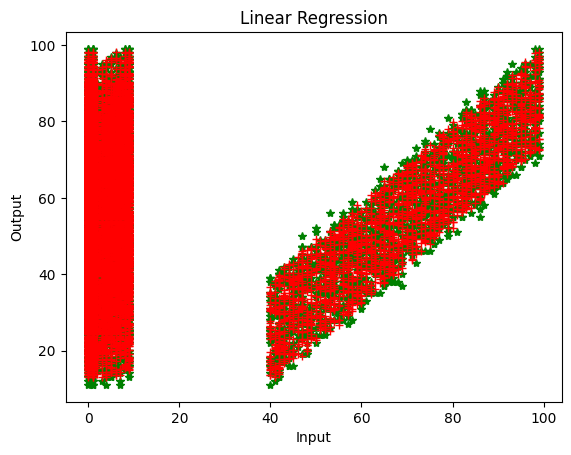

In [54]:
plt.plot(x_test, y_test, '*', color = 'green')
plt.plot(x_test, pred_value, '+', color = 'red')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression')
plt.show()